## Neural Network and Ensemble model

In [37]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix
from sklearn.feature_selection import SelectFromModel,RFECV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
import pydot
from io import StringIO
from sklearn.tree import export_graphviz

from Final_dm_tool import data_prep 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

### Splitting the dataset 

In [ ]:
df = data_prep()
y = df['IsBadBuy']
X = df.drop(['IsBadBuy'], axis=1)
rs = 10
X_mat = X.as_matrix()
X_train, X_test, y_train, y_test = train_test_split(X_mat, y, test_size=0.30, stratify=y, random_state=rs)

# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train, y_train)
X_test = scaler.transform(X_test)
print(X_train.shape)
# (7511, 126)

### Neural network --default setting

Iteration 1, loss = 0.57268070
Iteration 2, loss = 0.44165392
Iteration 3, loss = 0.40417661
Iteration 4, loss = 0.38264631
Iteration 5, loss = 0.36935748
Iteration 6, loss = 0.35663344
Iteration 7, loss = 0.34774915
Iteration 8, loss = 0.33848924
Iteration 9, loss = 0.33083630
Iteration 10, loss = 0.32268362
Iteration 11, loss = 0.31716630
Iteration 12, loss = 0.31070719
Iteration 13, loss = 0.30362967
Iteration 14, loss = 0.29717185
Iteration 15, loss = 0.29142836
Iteration 16, loss = 0.28685957
Iteration 17, loss = 0.28212004
Iteration 18, loss = 0.27701164
Iteration 19, loss = 0.27169478
Iteration 20, loss = 0.26781896
Iteration 21, loss = 0.26400840
Iteration 22, loss = 0.26049253
Iteration 23, loss = 0.25713231
Iteration 24, loss = 0.25297809
Iteration 25, loss = 0.24890159
Iteration 26, loss = 0.24505891
Iteration 27, loss = 0.24384444
Iteration 28, loss = 0.24097145
Iteration 29, loss = 0.23737273
Iteration 30, loss = 0.23534697
Iteration 31, loss = 0.23046598
Iteration 32, los

D:\Programs\conda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Text(0.5,1,'Confusion Matrix Default NN')

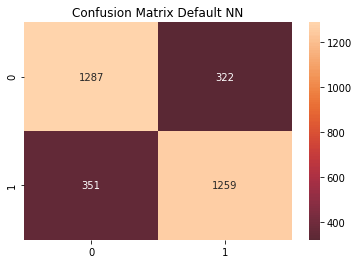

In [32]:
# Fitting model to the Training set
model = MLPClassifier(random_state=rs,verbose=True)
model.fit(X_train, y_train)

test_score=model.score(X_test, y_test)
train_score=model.score(X_train, y_train)

print(model)
print("\nTrain accuracy:", model.score(X_train, y_train))
print("Test accuracy:", model.score(X_test, y_test))

# Predicting the Test set results
y_pred = model.predict(X_test)
print('\n',classification_report(y_test, y_pred))


print('\n')

#  Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, center=True, annot=True, fmt="d").set_title("Confusion Matrix Default NN")

In [17]:
from ann_visualizer.visualize import ann_viz
#ann_viz(model, title="My first neural network")

### GridSearch


In [18]:
# Build classifier model as estimator for the GridSearchCV model
model_nn = MLPClassifier(random_state=rs, warm_start =True, max_iter=1000,verbose = True)

In [33]:
# Build GridSearchCV base model
def GridSearch(model, params):
    # grid search 
    #param_grid=params
    cv = GridSearchCV(param_grid= params,
                  estimator=model, 
                  scoring= 'accuracy',
                  cv=10, 
                  n_jobs=-1)
    
    # fit the model 
    cv.fit(X_train, y_train)
    
    # Print the model architecture
    print("\n Model Description\n", cv)
    
    # Evaluation metrics
    print("Train accuracy:", cv.score(X_train, y_train))
    print("Test accuracy:", cv.score(X_test, y_test))
    
    #Print Classification Report
    y_pred = cv.predict(X_test)
    print(classification_report(y_test, y_pred))
    print("\n Best Score", cv.best_score_)
    
    # Print the Best Params
    print("\n Best Param")
    print(cv.best_params_)
    
    #  Making the Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, center=True, annot=True, fmt="d",).set_title("Confusion Matrix")

Iteration 1, loss = 0.73149070
Iteration 2, loss = 0.63702476
Iteration 3, loss = 0.57654870
Iteration 4, loss = 0.53394666
Iteration 5, loss = 0.50213045
Iteration 6, loss = 0.47810029
Iteration 7, loss = 0.45930554
Iteration 8, loss = 0.44467804
Iteration 9, loss = 0.43348071
Iteration 10, loss = 0.42388614
Iteration 11, loss = 0.41648044
Iteration 12, loss = 0.40995254
Iteration 13, loss = 0.40522625
Iteration 14, loss = 0.40071040
Iteration 15, loss = 0.39664490
Iteration 16, loss = 0.39376198
Iteration 17, loss = 0.39037703
Iteration 18, loss = 0.38811304
Iteration 19, loss = 0.38547714
Iteration 20, loss = 0.38358959
Iteration 21, loss = 0.38176411
Iteration 22, loss = 0.38024194
Iteration 23, loss = 0.37810940
Iteration 24, loss = 0.37651702
Iteration 25, loss = 0.37507252
Iteration 26, loss = 0.37389579
Iteration 27, loss = 0.37232024
Iteration 28, loss = 0.37109238
Iteration 29, loss = 0.37011939
Iteration 30, loss = 0.36924906
Iteration 31, loss = 0.36777462
Iteration 32, los

Iteration 253, loss = 0.30782160
Iteration 254, loss = 0.30800781
Iteration 255, loss = 0.30778642
Iteration 256, loss = 0.30780286
Iteration 257, loss = 0.30793744
Iteration 258, loss = 0.30749825
Iteration 259, loss = 0.30814357
Iteration 260, loss = 0.30793277
Iteration 261, loss = 0.30778495
Iteration 262, loss = 0.30786604
Iteration 263, loss = 0.30776377
Iteration 264, loss = 0.30753085
Iteration 265, loss = 0.30777252
Iteration 266, loss = 0.30738805
Iteration 267, loss = 0.30748724
Iteration 268, loss = 0.30721077
Iteration 269, loss = 0.30736815
Iteration 270, loss = 0.30771270
Iteration 271, loss = 0.30807084
Iteration 272, loss = 0.30819404
Iteration 273, loss = 0.30723133
Iteration 274, loss = 0.30745632
Iteration 275, loss = 0.30718826
Iteration 276, loss = 0.30725638
Iteration 277, loss = 0.30729217
Iteration 278, loss = 0.30691471
Iteration 279, loss = 0.30695414
Iteration 280, loss = 0.30699357
Iteration 281, loss = 0.30708554
Iteration 282, loss = 0.30727517
Iteration 

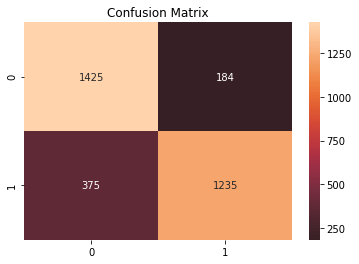

In [34]:
# Params with 1 param only
params = {'hidden_layer_sizes': [(x,) for x in range(5, 86, 20)]}
GridSearch(model_nn, params)

Iteration 1, loss = 0.73149070
Iteration 2, loss = 0.63702476
Iteration 3, loss = 0.57654870
Iteration 4, loss = 0.53394666
Iteration 5, loss = 0.50213045
Iteration 6, loss = 0.47810029
Iteration 7, loss = 0.45930554
Iteration 8, loss = 0.44467804
Iteration 9, loss = 0.43348071
Iteration 10, loss = 0.42388614
Iteration 11, loss = 0.41648044
Iteration 12, loss = 0.40995254
Iteration 13, loss = 0.40522625
Iteration 14, loss = 0.40071040
Iteration 15, loss = 0.39664490
Iteration 16, loss = 0.39376198
Iteration 17, loss = 0.39037703
Iteration 18, loss = 0.38811304
Iteration 19, loss = 0.38547714
Iteration 20, loss = 0.38358959
Iteration 21, loss = 0.38176411
Iteration 22, loss = 0.38024194
Iteration 23, loss = 0.37810940
Iteration 24, loss = 0.37651702
Iteration 25, loss = 0.37507252
Iteration 26, loss = 0.37389579
Iteration 27, loss = 0.37232024
Iteration 28, loss = 0.37109238
Iteration 29, loss = 0.37011939
Iteration 30, loss = 0.36924906
Iteration 31, loss = 0.36777462
Iteration 32, los

Iteration 260, loss = 0.30793277
Iteration 261, loss = 0.30778495
Iteration 262, loss = 0.30786604
Iteration 263, loss = 0.30776377
Iteration 264, loss = 0.30753085
Iteration 265, loss = 0.30777252
Iteration 266, loss = 0.30738805
Iteration 267, loss = 0.30748724
Iteration 268, loss = 0.30721077
Iteration 269, loss = 0.30736815
Iteration 270, loss = 0.30771270
Iteration 271, loss = 0.30807084
Iteration 272, loss = 0.30819404
Iteration 273, loss = 0.30723133
Iteration 274, loss = 0.30745632
Iteration 275, loss = 0.30718826
Iteration 276, loss = 0.30725638
Iteration 277, loss = 0.30729217
Iteration 278, loss = 0.30691471
Iteration 279, loss = 0.30695414
Iteration 280, loss = 0.30699357
Iteration 281, loss = 0.30708554
Iteration 282, loss = 0.30727517
Iteration 283, loss = 0.30696279
Iteration 284, loss = 0.30759833
Iteration 285, loss = 0.30680288
Iteration 286, loss = 0.30710848
Iteration 287, loss = 0.30680599
Iteration 288, loss = 0.30699080
Iteration 289, loss = 0.30727551
Iteration 

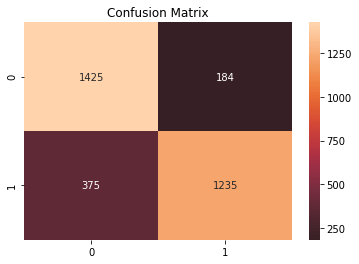

In [35]:
# Params with 2 params
params_2 = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 
          'alpha': [0.01,0.001, 0.0001,]}
GridSearch(model_nn,params_2)

Iteration 1, loss = 0.79360811
Iteration 2, loss = 0.62955020
Iteration 3, loss = 0.56513690
Iteration 4, loss = 0.51614896
Iteration 5, loss = 0.48175579
Iteration 6, loss = 0.45787544
Iteration 7, loss = 0.44075522
Iteration 8, loss = 0.42729071
Iteration 9, loss = 0.41773442
Iteration 10, loss = 0.40968115
Iteration 11, loss = 0.40183650
Iteration 12, loss = 0.39438362
Iteration 13, loss = 0.38806653
Iteration 14, loss = 0.38371561
Iteration 15, loss = 0.38043951
Iteration 16, loss = 0.37746211
Iteration 17, loss = 0.37456913
Iteration 18, loss = 0.37230042
Iteration 19, loss = 0.37025691
Iteration 20, loss = 0.36853310
Iteration 21, loss = 0.36616564
Iteration 22, loss = 0.36440642
Iteration 23, loss = 0.36259377
Iteration 24, loss = 0.36164660
Iteration 25, loss = 0.36007476
Iteration 26, loss = 0.35886203
Iteration 27, loss = 0.35732490
Iteration 28, loss = 0.35674605
Iteration 29, loss = 0.35539012
Iteration 30, loss = 0.35539094
Iteration 31, loss = 0.35501547
Iteration 32, los

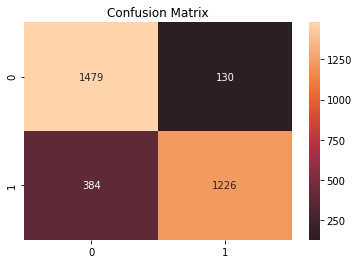

In [36]:
# Params with 6 params
params_6 = {'hidden_layer_sizes': [(2,), (3,), (4,),], #HLS=3 from last GridSearch
          'alpha': [0.001, 0.003, 0.005],# 0.001 from last GridSearch
          'activation': ['tanh', 'relu'], #added t
          'solver': ['sgd','adam'], # added
          'learning_rate': ['constant','adaptive'],
          'learning_rate_init':[0.01, 0.3, 0.5,1.0]}
GridSearch(model_nn,params_6)

### Feature selection (RFE,Log,Dt selection feature

In [21]:
model_lr = LogisticRegression(random_state=rs, max_iter = 10000) # converge warning @100: max_iter set to 1000

####  Log transformation on Logistic Regression

In [22]:
#Visualise numeric columns
def plot_skewed_columns(df):
    # setting up subplots for easier visualisation
    f, axes = plt.subplots(3,3, figsize=(12,12), sharex=False)

    # acquisition price plots
    sns.distplot(df['MMRAcquisitionAuctionAveragePrice'].dropna(), hist=False, ax=axes[0,0])
    sns.distplot(df['MMRAcquisitionAuctionCleanPrice'].dropna(), hist=False, ax=axes[0,1])
    sns.distplot(df['MMRAcquisitionRetailAveragePrice'].dropna(), hist=False, ax=axes[0,2])
    sns.distplot(df['MMRAcquisitonRetailCleanPrice'].dropna(), hist=False, ax=axes[1,0])

    # current price plots
    sns.distplot(df['MMRCurrentAuctionAveragePrice'].dropna(), hist=False, ax=axes[1,1])
    sns.distplot(df['MMRCurrentAuctionCleanPrice'].dropna(), hist=False, ax=axes[1,2])
    sns.distplot(df['MMRCurrentRetailAveragePrice'].dropna(), hist=False, ax=axes[2,0])
    sns.distplot(df['MMRCurrentRetailCleanPrice'].dropna(), hist=False, ax=axes[2,1])
    
    sns.distplot(df['VehBCost'].dropna(), hist=False, ax=axes[2,2]) 
    
#plot_skewed_columns(df)


# Transform columns and visualise
# list columns to be transformed
columns_to_transform = ['MMRAcquisitionAuctionAveragePrice', 'MMRAcquisitionAuctionCleanPrice', 'MMRAcquisitionRetailAveragePrice', 'MMRAcquisitonRetailCleanPrice',
                        'MMRCurrentAuctionAveragePrice', 'MMRCurrentAuctionCleanPrice', 'MMRCurrentRetailAveragePrice', 'MMRCurrentRetailCleanPrice','VehBCost']

# copy the dataframe
df_log = df.copy()

# transform the columns with np.log
for col in columns_to_transform:
    df_log[col] = df_log[col].apply(lambda x: x+1)
    df_log[col] = df_log[col].apply(np.log)
    
# plot them again to show the distribution
#plot_skewed_columns(df_log)
    

In [26]:
# create X, y and train test data partitions
y_log = df_log['IsBadBuy']
X_log = df_log.drop(['IsBadBuy'], axis=1)
X_mat_log = X_log.as_matrix()
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_mat_log, y_log, test_size=0.3, stratify=y_log, 
                                                                    random_state=rs)

# standardise them again
scaler_log = StandardScaler()
X_train_log = scaler_log.fit_transform(X_train_log, y_train_log)
X_test_log = scaler_log.transform(X_test_log)
# grid search CV for log transformed data
#params = {'C': [pow(10, x) for x in range(-6, 4)]}
params = {'C': [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7],
          'penalty':['l2'],}
          #'C':[0.8,1.2],
          #'solver':['newton-cg', 'lbfgs', 'sag', 'saga','liblinear']}
           # 'solver':['liblinear']}
    
cv = GridSearchCV(param_grid=params, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_log, y_train_log))
print("Test accuracy:", cv.score(X_test_log, y_test_log))

y_pred = cv.predict(X_test_log)
print(classification_report(y_test_log, y_pred))

# print parameters of the best model
print(cv.best_params_)

D:\Programs\conda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.
D:\Programs\conda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy: 0.8250565836772733
Test accuracy: 0.8195091643367506
              precision    recall  f1-score   support

           0       0.77      0.91      0.83      1609
           1       0.89      0.73      0.80      1610

   micro avg       0.82      0.82      0.82      3219
   macro avg       0.83      0.82      0.82      3219
weighted avg       0.83      0.82      0.82      3219

{'C': 1.0, 'penalty': 'l2'}


#### RFE on Logistic Regression Model

In [29]:
# RFE Logistic Regression 
#model_lr=LogisticRegression(random_state=rs, max_iter = 10000, solver = 'liblinear')
rfe = RFECV(estimator = LogisticRegression(random_state=rs, max_iter = 10000, solver = 'liblinear'), cv=10)
rfe.fit(X_train, y_train) # run the RFECV on log transformed dataset
# comparing how many variables before and after
print("Original feature set", X_train.shape[1])
print("Number of features after elimination", rfe.n_features_)

# output
#Original feature set 126
#Number of features after elimination 50

Original feature set 126
Number of features after elimination 50


D:\Programs\conda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Train accuracy: 0.8243908933564106
Test accuracy: 0.8229263746505125
              precision    recall  f1-score   support

           0       0.77      0.92      0.84      1609
           1       0.90      0.73      0.80      1610

   micro avg       0.82      0.82      0.82      3219
   macro avg       0.84      0.82      0.82      3219
weighted avg       0.84      0.82      0.82      3219

{'C': 1.0, 'penalty': 'l2'}


Text(0.5,1,'Confusion Matrix')

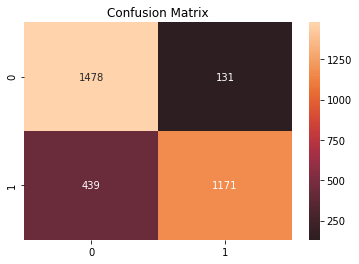

In [30]:
# transformed origial input taking only important features(50)
X_train_sel = rfe.transform(X_train)
X_test_sel = rfe.transform(X_test)
# RFE in GrisSearchCV LogistisRegression 
params = {'C': [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7],
          'penalty':['l2'],}

cv = GridSearchCV(param_grid=params, estimator= model_lr, cv=10, n_jobs=-1)
cv.fit(X_train_sel, y_train)

# test the best model
print("Train accuracy:", cv.score(X_train_sel, y_train))
print("Test accuracy:", cv.score(X_test_sel, y_test))

y_pred = cv.predict(X_test_sel)
print(classification_report(y_test, y_pred))

# print parameters of the best model
print(cv.best_params_)

#  Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, center=True, annot=True, fmt="d",).set_title("Confusion Matrix")
#Train accuracy: 0.8239914791638929
#Test accuracy: 0.8219944082013048
#            precision    recall  f1-score   support

#          0       0.77      0.92      0.84      1609
#          1       0.90      0.72      0.80      1610

#### Logistic Regression RFE + Log

In [ ]:
# running RFE + log transformation
rfe = RFECV(estimator = model_lr, cv=10)
rfe.fit(X_train_log, y_train_log) # run the RFECV on log transformed dataset

# comparing how many variables before and after
print("Original feature set", X_train_log.shape[1])
print("Number of features after elimination", rfe.n_features_)
# Original feature set 126
# Number of features after elimination 47

#rfe ranking
#print("Ranking", rfe._ranking)

# select features from log transformed dataset(47)
X_train_sel_log = rfe.transform(X_train_log)
X_test_sel_log = rfe.transform(X_test_log)

# init grid search CV on transformed dataset
cv = GridSearchCV(param_grid=params, estimator= model_lr, cv=10, n_jobs=-1)
cv.fit(X_train_sel_log, y_train_log)

# test the best model
print("Train accuracy:", cv.score(X_train_sel_log, y_train_log))
print("Test accuracy:", cv.score(X_test_sel_log, y_test_log))

y_pred_log = cv.predict(X_test_sel_log)
print(classification_report(y_test_log, y_pred_log))

# print parameters of the best model
print(cv.best_params_)

#  Making the Confusion Matrix
cm = confusion_matrix(y_test_log, y_pred)
sns.heatmap(cm, center=True, annot=True, fmt="d",).set_title("Confusion Matrix Regression RFE + Log")

#### Decision Tree feature selection

In [37]:
#from dm_tools import analyse_feature_importance
params = {'criterion': ['gini', 'entropy'],
          'max_depth': range(3, 8),
          'min_samples_leaf': range(20, 61, 10)}

cv = GridSearchCV(param_grid=params, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train_log, y_train_log)

print(cv.best_params_)
#analyse_feature_importance(cv.best_estimator_, X_log.columns)
# grab feature importances from the model

dm_model = cv.best_estimator_
importances = dm_model.feature_importances_  

# sort them out in descending order
indices = np.argsort(importances)
indices = np.flip(indices, axis=0)

# limit to 20 features, you can leave this out to print out everything
indices = indices[:20]

print("\n\n*********** Feature Importances ************\n")   
for i in indices:
    print(f"{X_log.columns[i]:<35}:{importances[i]}")

# 19 features with more than 0

from sklearn.feature_selection import SelectFromModel

selectmodel = SelectFromModel(cv.best_estimator_, prefit=True)
X_train_sel_model = selectmodel.transform(X_train)
X_test_sel_model = selectmodel.transform(X_test)

print(X_train_sel_model.shape)
# (7511, 12)

{'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 20}


*********** Feature Importances ************

Auction_ADESA                      :0.5176540074804418
MMRCurrentAuctionAveragePrice      :0.13174921064149606
VNST_OK                            :0.08327287541916883
VNST_CO                            :0.046980374393189514
VNST_AZ                            :0.041939879545988185
VNST_PA                            :0.026387168478151042
Auction_MANHEIM                    :0.024844892828453393
VNST_MO                            :0.023951674346237097
VehBCost                           :0.023357179241310644
WheelType_Covers                   :0.021930342177082365
VNST_CA                            :0.013959942257897904
VNST_NC                            :0.01197805445920417
MMRCurrentRetailRatio              :0.007710191209249742
VNST_FL                            :0.0062271442202155745
VNST_VA                            :0.004565215501667725
VNST_TX                            :0.0

#### Logistic Regression RFE and Log

##### Neural GridSearchCV using RFE from Logistic Regression

Iteration 1, loss = 0.66488259
Iteration 2, loss = 0.56860865
Iteration 3, loss = 0.51053064
Iteration 4, loss = 0.47501981
Iteration 5, loss = 0.45153033
Iteration 6, loss = 0.43506463
Iteration 7, loss = 0.42281238
Iteration 8, loss = 0.41313867
Iteration 9, loss = 0.40587406
Iteration 10, loss = 0.40028697
Iteration 11, loss = 0.39585033
Iteration 12, loss = 0.39220931
Iteration 13, loss = 0.38917261
Iteration 14, loss = 0.38617381
Iteration 15, loss = 0.38372360
Iteration 16, loss = 0.38145256
Iteration 17, loss = 0.37931408
Iteration 18, loss = 0.37728496
Iteration 19, loss = 0.37563579
Iteration 20, loss = 0.37398849
Iteration 21, loss = 0.37222824
Iteration 22, loss = 0.37097575
Iteration 23, loss = 0.36956937
Iteration 24, loss = 0.36843924
Iteration 25, loss = 0.36704381
Iteration 26, loss = 0.36567032
Iteration 27, loss = 0.36473613
Iteration 28, loss = 0.36321529
Iteration 29, loss = 0.36212634
Iteration 30, loss = 0.36093319
Iteration 31, loss = 0.36004026
Iteration 32, los

Text(0.5,1,'CM Neural Netwith Regression RFE')

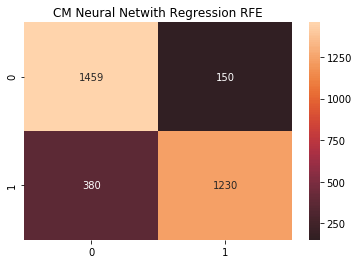

In [34]:
# Network using best params from neural network Grid Search and 50 input features from Regression RFE
model_nn_reg_RFE = GridSearchCV(param_grid= params_2, estimator=model_nn, scoring= 'accuracy',cv=10, n_jobs=-1)
    
# fit the model 
model_nn_reg_RFE.fit(X_train_sel, y_train)
    
# Print the model architecture
print("\n Model Description\n", model_nn_reg_RFE)
    
# Evaluation metrics
print("Train accuracy:", model_nn_reg_RFE.score(X_train_sel, y_train))
print("Test accuracy:", model_nn_reg_RFE.score(X_test_sel, y_test))
    
#Print Classification Report
y_pred = model_nn_reg_RFE.predict(X_test_sel)
print('\n',classification_report(y_test, y_pred))

print("\n Best Score", model_nn_reg_RFE.best_score_)
    
# Print the Best Params
print("\n Best Param")
print(model_nn_reg_RFE.best_params_)
    
#  Making the Confusion Matrix
#  Making the Confusion Matrix
cm = confusion_matrix(y_test_log, y_pred)
sns.heatmap(cm, center=True, annot=True, fmt="d",).set_title("CM Neural Netwith Regression RFE")

#### Neural GRidSearchCV using RFE  and Log Transformation from Logistic Regression

Iteration 1, loss = 0.68660039
Iteration 2, loss = 0.63229274
Iteration 3, loss = 0.58855427
Iteration 4, loss = 0.55206052
Iteration 5, loss = 0.52232020
Iteration 6, loss = 0.49813999
Iteration 7, loss = 0.47905221
Iteration 8, loss = 0.46384976
Iteration 9, loss = 0.45174492
Iteration 10, loss = 0.44195632
Iteration 11, loss = 0.43397873
Iteration 12, loss = 0.42742039
Iteration 13, loss = 0.42190976
Iteration 14, loss = 0.41720838
Iteration 15, loss = 0.41328878
Iteration 16, loss = 0.40976093
Iteration 17, loss = 0.40642366
Iteration 18, loss = 0.40323322
Iteration 19, loss = 0.40028133
Iteration 20, loss = 0.39758431
Iteration 21, loss = 0.39523078
Iteration 22, loss = 0.39296948
Iteration 23, loss = 0.39089846
Iteration 24, loss = 0.38865489
Iteration 25, loss = 0.38690061
Iteration 26, loss = 0.38518866
Iteration 27, loss = 0.38336403
Iteration 28, loss = 0.38195450
Iteration 29, loss = 0.38055477
Iteration 30, loss = 0.37905620
Iteration 31, loss = 0.37765626
Iteration 32, los

Text(0.5,1,'CM Neural Net model_nn_reg_RFELog')

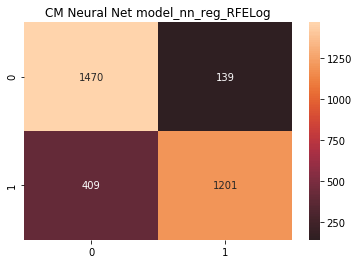

In [35]:
# Network using best params from neural network Grid Search and 47 input features from Regression RFE + Log
model_nn_reg_RFELog = GridSearchCV(param_grid= params_2, estimator=model_nn, scoring= 'accuracy',cv=10, n_jobs=-1)
    
# fit the model 
model_nn_reg_RFELog.fit(X_train_sel_log, y_train_log)
    
# Print the model architecture
print("\n Model Description\n", model_nn_reg_RFELog)
    
# Evaluation metrics
print("Train accuracy:", model_nn_reg_RFELog.score(X_train_sel_log, y_train_log))
print("Test accuracy:", model_nn_reg_RFELog.score(X_test_sel_log, y_test_log))
    
#Print Classification Report
y_pred = model_nn_reg_RFELog.predict(X_test_sel_log)
print('\n',classification_report(y_test_log, y_pred_log))
print("\n Best Score", model_nn_reg_RFELog.best_score_)
    
# Print the Best Params
print("\n Best Param")
print(model_nn_reg_RFELog.best_params_)
    
#  Making the Confusion Matrix
cm = confusion_matrix(y_test_log, y_pred)
sns.heatmap(cm, center=True, annot=True, fmt="d",).set_title("CM Neural Net model_nn_reg_RFELog")

#### Decision tree feature selection

#### Neural GRidSearchCV using feature selection from Decision tree

Iteration 1, loss = 0.73648625
Iteration 2, loss = 0.67080083
Iteration 3, loss = 0.62447537
Iteration 4, loss = 0.59012099
Iteration 5, loss = 0.56288563
Iteration 6, loss = 0.54086770
Iteration 7, loss = 0.52285228
Iteration 8, loss = 0.50804105
Iteration 9, loss = 0.49612988
Iteration 10, loss = 0.48607655
Iteration 11, loss = 0.47765043
Iteration 12, loss = 0.47042893
Iteration 13, loss = 0.46419602
Iteration 14, loss = 0.45875398
Iteration 15, loss = 0.45413551
Iteration 16, loss = 0.45010624
Iteration 17, loss = 0.44669364
Iteration 18, loss = 0.44368681
Iteration 19, loss = 0.44119852
Iteration 20, loss = 0.43904657
Iteration 21, loss = 0.43715404
Iteration 22, loss = 0.43552833
Iteration 23, loss = 0.43404135
Iteration 24, loss = 0.43237971
Iteration 25, loss = 0.43076313
Iteration 26, loss = 0.42925666
Iteration 27, loss = 0.42773450
Iteration 28, loss = 0.42655762
Iteration 29, loss = 0.42552538
Iteration 30, loss = 0.42467394
Iteration 31, loss = 0.42378300
Iteration 32, los

Text(0.5,1,'CM Decision Tree feature selection ')

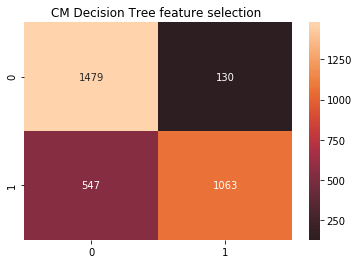

In [38]:
# Network using best params from neural network Grid Search and 12 features from Decision tree feature selection
#params = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params_2, estimator=model_nn, cv=10, n_jobs=-1)
cv.fit(X_train_sel_model, y_train)

print("Train accuracy:", cv.score(X_train_sel_model, y_train))
print("Test accuracy:", cv.score(X_test_sel_model, y_test))

y_pred = cv.predict(X_test_sel_model)
print(classification_report(y_test, y_pred))

print(cv.best_params_)

#  Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, center=True, annot=True, fmt="d",).set_title("CM Decision Tree feature selection ")

### Comparing Models

In [39]:
# grid search CV for decision tree
'''params_dt= {'criterion': ['gini'],
          'max_depth': range(2, 5),
          'min_samples_leaf': range(40, 61, 5)}
'''
params_dt = {'criterion': ['gini', 'entropy'],
          'max_depth': range(3, 8),
          'min_samples_leaf': range(20, 61, 10)}
cv = GridSearchCV(param_grid=params_dt, estimator=DecisionTreeClassifier(random_state=rs), cv=10)
cv.fit(X_train, y_train)

dt_model = cv.best_estimator_
print(dt_model)

# grid search CV for logistic regression

params_log_reg = {'C': [1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7],
          'penalty':['l2'],}
                  

cv = GridSearchCV(param_grid=params_log_reg, estimator=LogisticRegression(random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

log_reg_model = cv.best_estimator_
print(log_reg_model)

# grid search CV for NN
params_nn = {'hidden_layer_sizes': [(3,), (5,), (7,), (9,)], 'alpha': [0.01,0.001, 0.0001, 0.00001]}

cv = GridSearchCV(param_grid=params_nn, estimator=MLPClassifier(max_iter=500, random_state=rs), cv=10, n_jobs=-1)
cv.fit(X_train, y_train)

nn_model = cv.best_estimator_
print(nn_model)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=10,
            splitter='best')


D:\Programs\conda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.4, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)
MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(3,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=10, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)


 ### Ensemble model

In [40]:
# import the model
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

D:\Programs\conda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Ensemble train accuracy: 0.8460923978165358
Ensemble test accuracy: 0.8353525939732837


Text(0.5,1,'CM Ensemble method ')

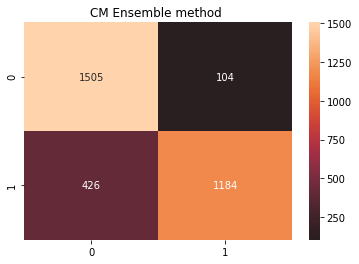

In [50]:
# initialise the classifier with 3 different estimators
voting = VotingClassifier(estimators=[('dt', dt_model), ('lr', log_reg_model), ('nn', nn_model)], voting='soft')
# fit the voting classifier to training data
voting.fit(X_train, y_train)

# evaluate train and test accuracy
print("Ensemble train accuracy:", voting.score(X_train, y_train))
print("Ensemble test accuracy:", voting.score(X_test, y_test))

# evaluate ROC auc score
y_pred_proba_ensemble = voting.predict_proba(X_test,)
y_pred_ensemble = voting.predict(X_test)
roc_index_ensemble = roc_auc_score(y_test, y_pred_proba_ensemble[:, 1])
#print("ROC score of voting classifier:", roc_index_ensemble)
y_pred_ensemble
#  Making the Confusion Matrix
cm = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm, center=True, annot=True, fmt="d",).set_title("CM Ensemble method ")

In [44]:
# ROC
y_pred_proba_dt = dt_model.predict_proba(X_test)
y_pred_proba_log_reg = log_reg_model.predict_proba(X_test)
y_pred_proba_nn = nn_model.predict_proba(X_test)

roc_index_dt = roc_auc_score(y_test, y_pred_proba_dt[:, 1])
roc_index_log_reg = roc_auc_score(y_test, y_pred_proba_log_reg[:, 1])
roc_index_nn = roc_auc_score(y_test, y_pred_proba_nn[:, 1])

print("ROC index on test for DT                 :", roc_index_dt)
print("ROC index on test for logistic regression:", roc_index_log_reg)
print("ROC index on test for NN                 :", roc_index_nn)
print("ROC score of voting classifier           :", roc_index_ensemble)

ROC index on test for DT                 : 0.8276580878521052
ROC index on test for logistic regression: 0.8819451146308228
ROC index on test for NN                 : 0.898450872228806
ROC score of voting classifier           : 0.9029504070658447


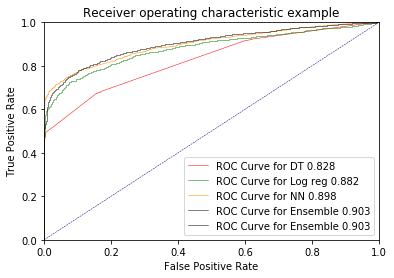

In [45]:
# plotting the ROC curve for comparison models

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt[:,1])
fpr_log_reg, tpr_log_reg, thresholds_log_reg = roc_curve(y_test, y_pred_proba_log_reg[:,1])
fpr_nn, tpr_nn, thresholds_nn = roc_curve(y_test, y_pred_proba_nn[:,1])
fpr_en, tpr_en, thresholds_en = roc_curve(y_test, y_pred_proba_ensemble[:,1])



plt.plot(fpr_dt, tpr_dt, label='ROC Curve for DT {:.3f}'.format(roc_index_dt), color='red', lw=0.5)
plt.plot(fpr_log_reg, tpr_log_reg, label='ROC Curve for Log reg {:.3f}'.format(roc_index_log_reg), color='green', lw=0.5)
plt.plot(fpr_nn, tpr_nn, label='ROC Curve for NN {:.3f}'.format(roc_index_nn), color='darkorange', lw=0.5)
plt.plot(fpr_en, tpr_en, thresholds_en, label='ROC Curve for Ensemble {:.3f}'.format(roc_index_ensemble), color='black', lw=0.5)

# plt.plot(fpr[2], tpr[2], color='darkorange',
#          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc[2])
plt.plot([0, 1], [0, 1], color='navy', lw=0.5, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [46]:
# Test Accuracy
y_pred_dt = dt_model.predict(X_test)
y_pred_log_reg = log_reg_model.predict(X_test)
y_pred_nn = nn_model.predict(X_test)

print("Accuracy score on test for DT                 :", accuracy_score(y_test, y_pred_dt))
print("Accuracy score on test for logistic regression:", accuracy_score(y_test, y_pred_log_reg))
print("Accuracy score on test for NN                 :", accuracy_score(y_test, y_pred_nn))
print("Accuracy score on test for Ensemble           :", voting.score(X_test, y_test))

Accuracy score on test for DT                 : 0.7573780677228953
Accuracy score on test for logistic regression: 0.8235476856166511
Accuracy score on test for NN                 : 0.8378378378378378
Accuracy score on test for Ensemble           : 0.8353525939732837


In [51]:
# Classification report for the models
cr_dt = classification_report(y_test, y_pred_dt)
cr_lr = classification_report(y_test, y_pred_log_reg)
cr_nn = classification_report(y_test, y_pred_nn)
cr_en = classification_report(y_test, y_pred_ensemble)


print('Classification report on Decision Tree \n\n', cr_dt)
print('\nClassification report on Logistic Regression \n\n', cr_lr)
print('\nClassification report on Neural Network \n\n', cr_nn)
print('\nClassification report on Ensemble Method  \n\n', cr_en)

Classification report on Decision Tree 

               precision    recall  f1-score   support

           0       0.72      0.84      0.78      1609
           1       0.81      0.68      0.74      1610

   micro avg       0.76      0.76      0.76      3219
   macro avg       0.76      0.76      0.76      3219
weighted avg       0.76      0.76      0.76      3219


Classification report on Logistic Regression 

               precision    recall  f1-score   support

           0       0.77      0.92      0.84      1609
           1       0.90      0.73      0.81      1610

   micro avg       0.82      0.82      0.82      3219
   macro avg       0.84      0.82      0.82      3219
weighted avg       0.84      0.82      0.82      3219


Classification report on Neural Network 

               precision    recall  f1-score   support

           0       0.79      0.92      0.85      1609
           1       0.91      0.75      0.82      1610

   micro avg       0.84      0.84      0.84    

Text(0.5,1,'CM Ensemble method ')

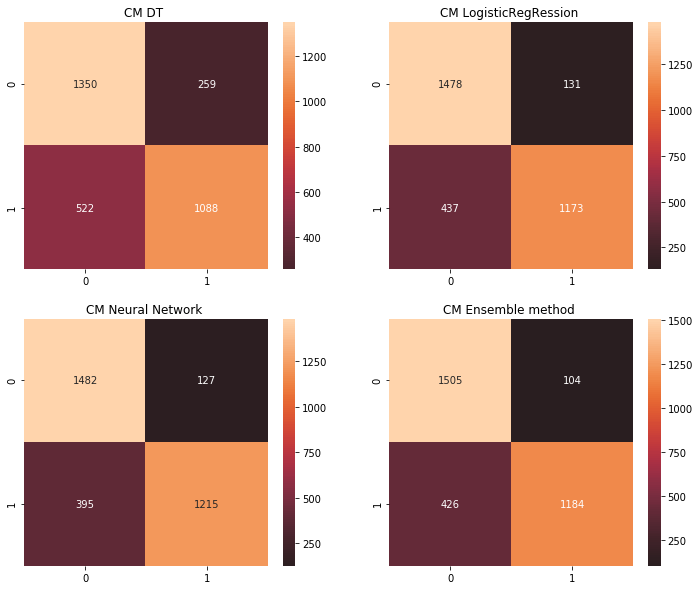

In [54]:
# confusionn metrics
f, axes = plt.subplots(2,2, figsize=(12,10), sharex=False)

cm = confusion_matrix(y_test, y_pred_dt)
sns.heatmap(cm, center=True, annot=True, fmt="d", ax=axes[0,0]).set_title("CM DT ")

cm = confusion_matrix(y_test, y_pred_log_reg)
sns.heatmap(cm, center=True, annot=True, fmt="d", ax=axes[0,1]).set_title("CM LogisticRegRession ")

cm = confusion_matrix(y_test, y_pred_nn)
sns.heatmap(cm, center=True, annot=True, fmt="d", ax=axes[1,0]).set_title("CM Neural Network ")

cm = confusion_matrix(y_test, y_pred_ensemble)
sns.heatmap(cm, center=True, annot=True, fmt="d", ax=axes[1,1]).set_title("CM Ensemble method ")
